AxesImage(54,36;334.8x217.44)


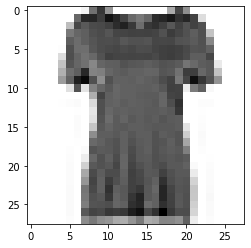

(10000, 28, 28)

In [27]:
#Deep learning model for identifying images
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras import backend as K
import numpy as np
import pickle
import matplotlib.pyplot as plt
#Opening files for reading the data
fileObjectx = open('trainX.pickle','rb')
fileObjecty = open('trainY.pickle','rb')
fileObjectX = open('testX.pickle','rb')

# load the object from the files
trainX= pickle.load(fileObjectx)  
print(plt.imshow(trainX[10],cmap=plt.cm.binary))
plt.show()
trainX.shape
trainY= pickle.load(fileObjecty)
trainY.shape
testX1= pickle.load(fileObjectX)

testX1.shape


In [28]:
#Splitting the data into training data and testing data

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(trainX,trainY,random_state=1)


In [29]:
print(X_test.shape)
print(y_test.shape)

(15000, 28, 28)
(15000,)


In [30]:
#Parameters for training the model

#number of training examples utilized in one iteration
batch_size = 128

#number of classes of the output
num_classes = 10

#number of times the model loop through data for training
epochs = 100

In [31]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

X_train shape: (45000, 28, 28)
45000 train samples
15000 test samples


In [32]:
X_train = np.reshape(X_train, (45000, 784))
X_test = np.reshape(X_test, (15000, 784))

#data for which prediction is to be made
testX=np.reshape(testX1,(10000,784))

X_train.shape

(45000, 784)

In [34]:
#Using Sequential model
model = Sequential()
model.add(Dense(500, input_dim=784), )
# Activation function-Rectified Linear Unit,returns 0 if it founds a negative value and the value x for positive value 
model.add(Activation('relu'))

#Using Dropout to stop overfitting
model.add(Dropout(0.4))
model.add(Dense(300))
model.add(Activation('relu'))

#Using Dropout to stop overfitting
model.add(Dropout(0.4))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

#Adadelta optimizer continues learning even when many updates have been done
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 500)               392500    
_________________________________________________________________
activation_10 (Activation)   (None, 500)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 300)               150300    
_________________________________________________________________
activation_11 (Activation)   (None, 300)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                3010      
__________

In [ ]:
#set early stopping monitor so the model stops training when it won't improve anymore
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=5)

#Train model
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test),callbacks=[early_stopping_monitor])

#loss and accuracy returnedfrom evaluate function
loss,accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy*100,'%')

Train on 45000 samples, validate on 15000 samples
Epoch 1/100
45000/45000 [==============================] - 10s 222us/step - loss: 0.2999 - acc: 0.8898 - val_loss: 0.3131 - val_acc: 0.8856
Epoch 2/100
45000/45000 [==============================] - 11s 236us/step - loss: 0.2963 - acc: 0.8922 - val_loss: 0.3243 - val_acc: 0.8842
Epoch 3/100
45000/45000 [==============================] - 10s 228us/step - loss: 0.2873 - acc: 0.8940 - val_loss: 0.3146 - val_acc: 0.8847
Epoch 4/100
45000/45000 [==============================] - 10s 228us/step - loss: 0.2847 - acc: 0.8935 - val_loss: 0.3138 - val_acc: 0.8899
Epoch 5/100
45000/45000 [==============================] - 10s 232us/step - loss: 0.2830 - acc: 0.8949 - val_loss: 0.3097 - val_acc: 0.8920
Epoch 6/100
45000/45000 [==============================] - 10s 228us/step - loss: 0.2748 - acc: 0.8972 - val_loss: 0.3160 - val_acc: 0.8913
Epoch 7/100
20992/45000 [============>.................] - ETA: 5s - loss: 0.2675 - acc: 0.9003

In [38]:
#Predicting for the test data
pred=model.predict(X_test)
test_result=np.argmax(pred[0])
print(test_result)

#Saving the model 
model.save('apparels_image_reader.model')

#loading the saved model for prediction 
new_model=keras.models.load_model('apparels_image_reader.model')

#Prediction on the new data
prediction=new_model.predict(testX)
#print(prediction)


3


In [40]:
#Storing the predictions in a pickle file named result.
filename = 'result.pickle'
outfile = open(filename,'wb')
pickle.dump(prediction,outfile)
outfile.close()

